In [294]:
import pandas as pd
import numpy as np

from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, metrics, tree, ensemble
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [295]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


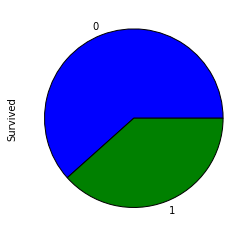

In [297]:
train.Survived.value_counts().plot(kind='pie', figsize=(4,4))

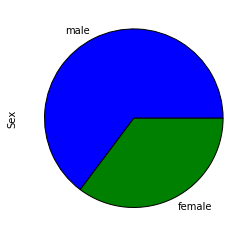

In [298]:
train.Sex.value_counts().plot(kind='pie', figsize=(4,4))

In [300]:
train.drop(['Name'], axis=1, inplace=True)
test.drop(['Name'], axis=1, inplace=True)

ValueError: labels ['Name'] not contained in axis

In [268]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [301]:
train['Test'] = False
test['Test'] = True
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False


In [302]:
data = pd.concat([train, test], ignore_index=True)
data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Test,Ticket
0,22.0,NaN,S,7.2500,0,1,3,male,1,0.0,False,A/5 21171
1,38.0,C85,C,71.2833,0,2,1,female,1,1.0,False,PC 17599
2,26.0,NaN,S,7.9250,0,3,3,female,0,1.0,False,STON/O2. 3101282
3,35.0,C123,S,53.1000,0,4,1,female,1,1.0,False,113803
4,35.0,NaN,S,8.0500,0,5,3,male,0,0.0,False,373450


In [303]:
data[data['Test']==True].shape

(418, 12)

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Test           1309 non-null bool
Ticket         1309 non-null object
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 124.0+ KB


In [305]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Test              0
Ticket            0
dtype: int64

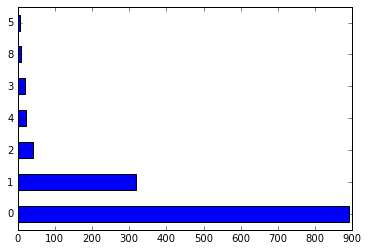

In [306]:
data.SibSp.value_counts()[:20].plot(kind='barh')

In [307]:
data['SexBool']=(data.Sex=='male').astype(int)
data.drop(['Sex'], axis=1,inplace=True)
data.head()

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Test,Ticket,SexBool
0,22.0,NaN,S,7.2500,0,1,3,1,0.0,False,A/5 21171,1
1,38.0,C85,C,71.2833,0,2,1,1,1.0,False,PC 17599,0
2,26.0,NaN,S,7.9250,0,3,3,0,1.0,False,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,0,4,1,1,1.0,False,113803,0
4,35.0,NaN,S,8.0500,0,5,3,0,0.0,False,373450,1


In [308]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [309]:
train.Cabin.value_counts().head()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
Name: Cabin, dtype: int64

In [310]:
data['idEmbar']=0
data.idEmbar[data['Embarked']=='C']=1
data.idEmbar[data['Embarked']=='Q']=2
data[data['Embarked']=='Q'].head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Test,Ticket,SexBool,idEmbar
5,NaN,NaN,Q,8.4583,0,6,3,0,0.0,False,330877,1,2
16,2.0,NaN,Q,29.1250,1,17,3,4,0.0,False,382652,1,2
22,15.0,NaN,Q,8.0292,0,23,3,0,1.0,False,330923,0,2
28,NaN,NaN,Q,7.8792,0,29,3,0,1.0,False,330959,0,2
32,NaN,NaN,Q,7.7500,0,33,3,0,1.0,False,335677,0,2


In [311]:
data.drop(['Embarked', 'Cabin','Ticket','PassengerId'], axis=1,inplace=True)

In [312]:
data[data['Test']==True].shape

(418, 9)

In [313]:
data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0,3,1,0.0,False,1,0
1,38.0,71.2833,0,1,1,1.0,False,0,1
2,26.0,7.9250,0,3,0,1.0,False,0,0
3,35.0,53.1000,0,1,1,1.0,False,0,0
4,35.0,8.0500,0,3,0,0.0,False,1,0


In [314]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 9 columns):
Age         1046 non-null float64
Fare        1308 non-null float64
Parch       1309 non-null int64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
Survived    891 non-null float64
Test        1309 non-null bool
SexBool     1309 non-null int32
idEmbar     1309 non-null int64
dtypes: bool(1), float64(3), int32(1), int64(4)
memory usage: 88.2 KB


In [315]:
data.isnull().sum()

Age         263
Fare          1
Parch         0
Pclass        0
SibSp         0
Survived    418
Test          0
SexBool       0
idEmbar       0
dtype: int64

In [316]:
data_back=data.copy()


In [320]:
data_back[data_back['Test']==True].shape
data_back.shape

(1309, 9)

In [327]:
data=data_back.copy()

In [328]:
data_back[data_back['Fare'].isnull()]

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
1043,60.5,NaN,0,3,0,NaN,True,1,0


In [329]:
data.Fare[data['Fare'].isnull()]=data.Fare.mean()
data[data['Test']==True].shape

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(418, 9)

In [330]:
data.ix[1043]

Age            60.5
Fare        33.2955
Parch             0
Pclass            3
SibSp             0
Survived        NaN
Test           True
SexBool           1
idEmbar           0
Name: 1043, dtype: object

In [331]:
nullAge=data.copy()
#data=nullAge
nullAge[nullAge['Test']==True].shape

(418, 9)

In [332]:
data.Age[data['Age'].isnull()] = data.Age.mean()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [333]:
data[data['Test']==True].shape

(418, 9)

In [147]:
data.isnull().sum()

Age           0
Fare          0
Parch         0
Pclass        0
SibSp         0
Survived    331
Test          0
SexBool       0
idEmbar       0
dtype: int64

In [334]:
import scipy.stats as ss

In [335]:
data.corr()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
Age,1.000000,0.171521,-0.130872,-0.366371,-0.190747,-0.070323,0.016536,0.057397,0.035824
Fare,0.171521,1.000000,0.221522,-0.558477,0.160224,0.257307,0.030806,-0.185484,0.061118
Parch,-0.130872,0.221522,1.000000,0.018322,0.373587,0.081629,0.005793,-0.213125,-0.095523
Pclass,-0.366371,-0.558477,0.018322,1.000000,0.060832,-0.338481,-0.023988,0.124617,0.038875
SibSp,-0.190747,0.160224,0.373587,0.060832,1.000000,-0.035322,-0.033867,-0.109609,-0.073461
Survived,-0.070323,0.257307,0.081629,-0.338481,-0.035322,1.000000,NaN,-0.543351,0.106811
Test,0.016536,0.030806,0.005793,-0.023988,-0.033867,NaN,1.000000,-0.010928,0.073312
SexBool,0.057397,-0.185484,-0.213125,0.124617,-0.109609,-0.543351,-0.010928,1.000000,-0.120423
idEmbar,0.035824,0.061118,-0.095523,0.038875,-0.073461,0.106811,0.073312,-0.120423,1.000000


In [336]:
befCorr=data
#data=befCorr
befCorr.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0,3,1,0.0,False,1,0
1,38.0,71.2833,0,1,1,1.0,False,0,1
2,26.0,7.9250,0,3,0,1.0,False,0,0
3,35.0,53.1000,0,1,1,1.0,False,0,0
4,35.0,8.0500,0,3,0,0.0,False,1,0


In [337]:
befCorr.drop(['Pclass'], axis=1, inplace=True)

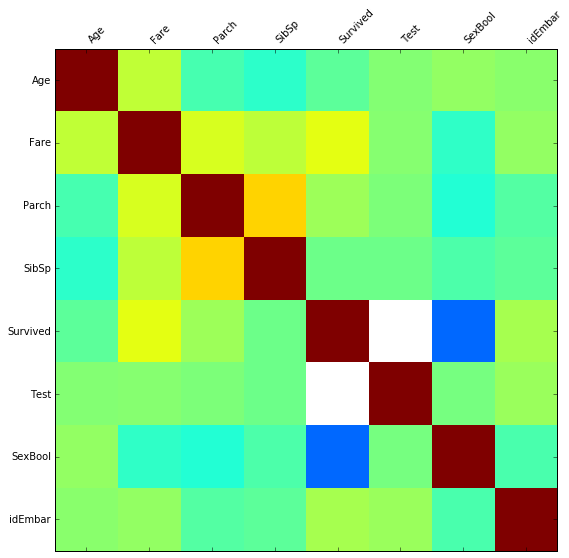

In [338]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(befCorr.corr(), vmin=-1, vmax=1)
plt.yticks(range(befCorr.shape[1]), befCorr.columns)
plt.xticks(range(befCorr.shape[1]), befCorr.columns, rotation=45, ha="left" )
plt.show()

In [357]:
from sklearn import cross_validation, datasets, metrics, tree, ensemble, linear_model
from sklearn import preprocessing

In [340]:
data.head()

,Age,Fare,Parch,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0,1,0.0,False,1,0
1,38.0,71.2833,0,1,1.0,False,0,1
2,26.0,7.9250,0,0,1.0,False,0,0
3,35.0,53.1000,0,1,1.0,False,0,0
4,35.0,8.0500,0,0,0.0,False,1,0


In [341]:
x=data[data.Test==False].copy()
x.drop(['Survived', 'Test'], axis=1, inplace=True)

In [342]:
x_t=data[data.Test==True].copy()
x_t.drop(['Survived', 'Test'], axis=1, inplace=True)
x_t=pd.DataFrame(preprocessing.normalize(x_t))
x_t.shape

(418, 6)

In [343]:
x=pd.DataFrame(preprocessing.normalize(x))
x.head()

,0,1,2,3,4,5
0,0.947992,0.312406,0.0,0.043091,0.043091,0.000000
1,0.470345,0.882309,0.0,0.012377,0.000000,0.012377
2,0.956551,0.291564,0.0,0.000000,0.000000,0.000000
3,0.550270,0.834839,0.0,0.015722,0.000000,0.000000
4,0.974178,0.224061,0.0,0.000000,0.027834,0.000000


In [344]:
y=data[data.Test==False].Survived.copy()

In [345]:
data.head()

,Age,Fare,Parch,SibSp,Survived,Test,SexBool,idEmbar
0,22.0,7.2500,0,1,0.0,False,1,0
1,38.0,71.2833,0,1,1.0,False,0,1
2,26.0,7.9250,0,0,1.0,False,0,0
3,35.0,53.1000,0,1,1.0,False,0,0
4,35.0,8.0500,0,0,0.0,False,1,0


Рандомный лес

In [346]:
x_tr,x_ts,y_tr,y_ts=cross_validation.train_test_split(x,y,test_size = 0.3)

In [372]:
clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)

In [373]:
clf.fit(x_tr, y_tr)
predictions = clf.predict(x_ts)
metrics.accuracy_score(y_ts, predictions)
cross_validation.cross_val_score(clf, x, y, scoring = 'accuracy', cv = 10).mean()

0.81486494155033484

Лог регрессия

In [358]:
clf = linear_model.SGDClassifier(loss = 'log', random_state = 1)

In [359]:
clf.fit(x_tr, y_tr)
predictions = clf.predict(x_ts)
metrics.accuracy_score(y_ts, predictions)
cross_validation.cross_val_score(clf, x, y, scoring = 'accuracy', cv = 10).mean()

0.62755901713766882

In [374]:
predictions = clf.predict(x_t)
predictions.shape

(418,)

In [375]:
len(test["PassengerId"])

418

In [382]:
predictions=predictions.astype(int)

In [383]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": predictions
})

In [384]:
submission.to_csv("titanic-submission.csv", index=False)